<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-02-tree-based-models-bagging-randomforest-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 2.2 Random Forest (RF)

A **Random Forest** is an ensemble machine learning algorithm used for classification, regression, and other tasks. It combines multiple decision trees to improve predictive accuracy and reduce overfitting. Each tree is trained on a random subset of the data and features, and their predictions are aggregated to produce a final output. This tutorial provides an overview of Random Forest, its key characteristics, how it works, and a step-by-step implementation in R from scratch. It also covers the use of the several R packages  such as {randomForest}, {ranger} and {randomForestSRC} packages for practical applications.




## Overview

Random Forest (RF) is a powerful ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It is widely used in various fields, including finance, healthcare, and marketing, due to its robustness and versatility. RF is particularly effective for high-dimensional datasets and can handle both categorical and continuous variables. It also provides insights into feature importance, helping to identify the most relevant predictors in a dataset.


### Key Characteristics

Random Forest builds a "forest" of decision trees, where each tree is trained independently on a random subset of the dataset. The key ideas are:

1. `Ensemble of Trees`: Uses many decision trees for predictions.
2. `Bagging*` Trains each tree on a random data subset with replacement.
3. `Feature Randomness`: Considers random feature subsets for splits.
4. `Robustness`: Reduces overfitting and handles noise well.
5. `Feature Importance`: Measures variable contribution.
6. `Scalable`: Parallelizable for large datasets.
7. `Handles Missing Data/Outliers`: Robust to incomplete or noisy data.
8. `OOB Error`: Estimates performance using out-of-bag data.
9. `Versatile`: Works for classification, regression, and feature selection.
10. `Hyperparameters`: Tunable (e.g., number of trees, max depth).



## How Random Forest Works

Here’s the step-by-step process:

1. Bootstrap Sampling

Random Forest uses bagging (Bootstrap Aggregating) to create multiple subsets of the training data. For each tree, a random sample of the data is drawn with replacement, typically of the same size as the original dataset.

-   Given a dataset $D$ with $N$ samples, create $T$ bootstrap samples $D_1, D_2, \dots, D_T$. Each $D_t$ is generated by sampling $N$ instances from $D$ with replacement.

-   About 63% of the data is included in each bootstrap sample (due to the 1-$1/e$ rule for sampling with replacement), and the remaining \~37% form the `Out-of-Bag (OOB)` data, used for validation.

2. Building Decision Trees

Each tree is grown on a bootstrap sample, using random feature selection at each split, typically until the tree reaches a maximum depth or a minimum node size.

-   For each bootstrap sample $D_t$, train a decision tree $h_t(x)$.

-   At each node of the tree, instead of considering all $p$ features, randomly select a subset of $m$ features (typically $m = \sqrt{p}$ for `classification` or $m = p/3$ for `regression`).

-   Choose the best split among these $m$ features using a criterion (e.g., Gini impurity for classification, mean squared error for regression).

Each tree is built by recursively splitting the feature space into regions based on feature thresholds. For a node split:

`Classification (Gini Impurity):` For a node with classes $k = 1, 2, \dots, K$, the Gini impurity is:

$$ G = 1 - \sum_{k=1}^K p_k^2 $$

where $p_k$ is the proportion of class \$k in the node. The split minimizes the weighted Gini impurity of child nodes:

$$ \text{Gini}_{\text{split}} = \frac{N_1}{N} G_1 + \frac{N_2}{N} G_2 $$

where $N_1, N_2$ are the sizes of the child nodes, and $G_1, G_2$ are their Gini impurities.

`Regression (Mean Squared Error):` For regression, the split minimizes the variance (or MSE) in the child nodes:

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2 $$

where $\bar{y}$ is the mean target value in the node. The split minimizes:

$$  \text{MSE}_{\text{split}} = \frac{N_1}{N} \text{MSE}_1 + \frac{N_2}{N} \text{MSE}_2 $$

3. Prediction Aggregation

`Classification`:

-   The final prediction is the mode (majority vote) of the predictions from all trees

-   Each tree $h_t(x)$ predicts a class for input $x$. The final prediction is the majority vote across all $T$ trees:

$$ \hat{y} = \text{mode} \{ h_1(x), h_2(x), \dots, h_T(x) \} $$

`Regression`:

-   The final prediction is the mean (or median) of the predictions from all trees

-   Each tree predicts a continuous value, and the final prediction is the average:

$$ \hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x) $$

4. Out-of-Bag (OOB) Error Estimation

Since each tree is trained on a subset of the data, the remaining (out-of-bag) samples can be used to estimate the model's generalization error without needing a separate validation set.

-   For each sample $x_i$, use only the trees where $x_i$ was not included in the bootstrap sample (OOB data) to make a prediction.

-   Compute the OOB error by comparing these predictions to the true labels. This provides an unbiased estimate of the model’s performance without needing a separate validation set.


Here below is a flowchart illustrating the Random Forest workflow:


![alt text](http://drive.google.com/uc?export=view&id=1s6XQ0x1NvEtWSSVa3__E3xgXl6tuE15R)

---







### Some Key Concepts

#### Bagging

Bagging reduces variance by averaging predictions over $T$ trees trained on bootstrap samples. For regression, the variance of the ensemble prediction is:

$$ \text{Var}(\hat{y}) = \frac{1}{T} \text{Var}(h_t(x)) + \text{Cov}(h_t(x), h_{t'}(x)) $$

Random feature selection reduces the covariance $\text{Cov}(h_t, h_{t'})$ between trees, making the ensemble more robust.

#### Feature Importance

Random Forest measures feature importance by calculating the average decrease in impurity (or MSE) across all splits involving a feature. For feature $j$"

$$ \text{Importance}_j = \frac{1}{T} \sum_{t=1}^T \sum_{\text{nodes using } j} \Delta \text{Impurity} $$

Alternatively, `permutation importance` is computed by shuffling feature $j$’s values and measuring the increase in OOB error.

#### Bias-Variance Tradeoff

A single decision tree has low bias but high variance (overfits). Random Forest reduces variance by averaging over ( T ) trees:

$$ \text{Ensemble Variance} \approx \frac{\text{Single Tree Variance}}{T} \quad (\text{if trees are uncorrelated}) $$

In practice, trees are correlated due to similar data and features, but random feature selection mitigates this.


### Why Random Forest Works

Random Forest works well due to several key factors:

-   `Diversity:` Random sampling of data and features ensures trees are different, reducing overfitting.
-   `Robustness:` Averaging or voting smooths out individual tree errors.
-   `Generalization:` OOB error provides a reliable estimate of performance, and the ensemble is less sensitive to noise.

### Advantages:

-   Handles high-dimensional data well.
-   Robust to outliers and noise.
-   Provides feature importance and OOB error estimates.
-   Works for both classification and regression.

### Limitations:

-   Computationally intensive for large datasets or many trees.
-   Less interpretable than a single decision tree.
-   May not perform as well as gradient boosting for some tasks.

### Key Hyperparameters

-   Number of trees ($T$): More trees reduce variance but increase computation. Typically 100–1000.
-   Number of features ($m$): Smaller $m$ increases randomness, reducing correlation between trees.
-   Max depth or min samples per leaf: Controls tree complexity to prevent overfitting.

## Random Forest Implementation in Python from Scratch

I provide a detailed implementation of Random Forest for both classification (using the Iris dataset) and regression (using the Boston Housing dataset) in Python without relying on external packages like randomForest. I’ll create a simplified version from scratch, including bootstrap sampling, decision tree construction (using base R’s recursive partitioning logic), and ensemble aggregation.

In [2]:
import numpy as np
import pandas as pd
from collections import Counter


### Function for Bootstrap Sampling

Boostrap sampling is a technique used to create multiple samples from a dataset by randomly selecting observations with replacement. This is a key step in building Random Forest models, as it allows for the creation of diverse training sets for each tree in the forest.   Below is a helper function to perform bootstrap sampling in R:

In [3]:
# Set seed for reproducibility
np.random.seed(123)

# Helper function: Bootstrap sampling
def bootstrap_sample(data, n):
    indices = np.random.choice(len(data), size=n, replace=True)
    return data.iloc[indices].reset_index(drop=True)

### Functions for Gini Impurity (classification) and MSE (rergression)

Gini impurity and Mean Squared Error (MSE) are two common metrics used to evaluate the quality of splits in decision trees. Gini impurity is used for classification tasks, while MSE is used for regression tasks. Below are the helper functions to calculate these metrics:

In [4]:
# Helper function: Gini impurity for classification
def gini_impurity(labels):
    if len(labels) == 0:
        return 0
    probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(probs ** 2)

# Helper function: MSE for regression
def mse(values):
    if len(values) == 0:
        return 0
    mean_val = np.mean(values)
    return np.mean((values - mean_val) ** 2)

### Functions for Building Decision Trees

 `build_tree_class` (Classification): Builds a decision tree for classification, minimizing **Gini impurity**.

  1. **Stop**: Returns majority class if depth ≥ `max_depth`, data < 2 rows, or single class.
  2. **Features**: Randomly selects `m_features` (≈√p) for splitting.
  3. **Split**: Finds split with lowest weighted Gini impurity across features and split points.
  4. **Recurse**: Builds left/right subtrees or returns majority class if no valid split.


 `build_tree_reg` (Regression):  Builds a decision tree for regression, minimizing **MSE**.

  1. **Stop**: Returns mean target value if depth ≥ `max_depth` or data < 2 rows.
  2. **Features**: Randomly selects `m_features` (≈p/3) for splitting.
  3. **Split**: Finds split with lowest weighted MSE.
  4. **Recurse**: Builds left/right subtrees or returns mean if no valid split.


In [12]:
# Simplified decision tree node for classification
def build_tree_class(data, depth, max_depth, m_features, target_col):
    """Recursively build a decision tree classifier using Gini impurity."""
    # Base cases: max depth reached, too few samples, or single class
    if depth >= max_depth or len(data) < 2 or len(data[target_col].unique()) == 1:
        # Leaf node: return most common class
        most_common_class = data[target_col].value_counts().idxmax()
        return {'leaf': True, 'class': most_common_class}
    
    # Select random subset of features (m_features = sqrt(p))
    features = [col for col in data.columns if col != target_col]
    features = np.random.choice(features, size=m_features, replace=False)
    
    best_gini = float('inf')
    best_split = None
    best_feature = None
    best_left = None
    best_right = None
    
    # Try each feature and possible split
    for feature in features:
        values = np.sort(data[feature].unique())
        splits = (values[:-1] + values[1:]) / 2
        
        for split in splits:
            left = data[data[feature] <= split]
            right = data[data[feature] > split]
            
            if len(left) == 0 or len(right) == 0:
                continue
            
            gini_left = gini_impurity(left[target_col])
            gini_right = gini_impurity(right[target_col])
            weighted_gini = (len(left) / len(data)) * gini_left + (len(right) / len(data)) * gini_right
            
            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_split = split
                best_feature = feature
                best_left = left
                best_right = right
    
    # If no valid split found, return leaf
    if best_feature is None:
        most_common_class = data[target_col].value_counts().idxmax()
        return {'leaf': True, 'class': most_common_class}
    
    # Recursively build left and right subtrees
    left_subtree = build_tree_class(best_left, depth + 1, max_depth, m_features, target_col)
    right_subtree = build_tree_class(best_right, depth + 1, max_depth, m_features, target_col)
    
    # Return internal node
    return {
        'leaf': False,
        'feature': best_feature,
        'split': best_split,
        'left': left_subtree,
        'right': right_subtree
    }



# Simplified decision tree node for regression
def build_tree_reg(data, depth, max_depth, m_features, target_col):
    if depth >= max_depth or len(data) < 2:
        # Leaf node: return mean value
        return {'leaf': True, 'value': data[target_col].mean()}

    # Select random subset of features (m_features = p/3)
    features = [col for col in data.columns if col != target_col]
    features = np.random.choice(features, size=m_features, replace=False)

    best_mse = float('inf')
    best_split = None
    best_feature = None
    best_left = None
    best_right = None

    # Try each feature and possible split
    for feature in features:
        values = np.sort(data[feature].unique())
        splits = (values[:-1] + values[1:]) / 2

        for split in splits:
            left = data[data[feature] <= split]
            right = data[data[feature] > split]

            if len(left) == 0 or len(right) == 0:
                continue

            mse_left = mse(left[target_col])
            mse_right = mse(right[target_col])
            weighted_mse = (len(left) / len(data)) * mse_left + (len(right) / len(data)) * mse_right

            if weighted_mse < best_mse:
                best_mse = weighted_mse
                best_split = split
                best_feature = feature
                best_left = left
                best_right = right

    # If no valid split found, return leaf
    if best_feature is None:
        return {'leaf': True, 'value': data[target_col].mean()}

    # Recursively build left and right subtrees
    left_tree = build_tree_reg(best_left, depth + 1, max_depth, m_features, target_col)
    right_tree = build_tree_reg(best_right, depth + 1, max_depth, m_features, target_col)

    return {
        'leaf': False,
        'feature': best_feature,
        'split': best_split,
        'left': left_tree,
        'right': right_tree
    }


### Functions for Prediction

In [13]:
## Predict function for a single tree (classification)
def predict_tree_class(tree, row):
    if tree['leaf']:
        return tree['class']

    if row[tree['feature']] <= tree['split']:
        return predict_tree_class(tree['left'], row)
    else:
        return predict_tree_class(tree['right'], row)

# Predict function for a single tree (regression)
def predict_tree_reg(tree, row):
    if tree['leaf']:
        return tree['value']

    # Check if the feature exists in the row and is numeric before comparison
    if tree['feature'] in row and isinstance(row[tree['feature']], (int, float)):
        if row[tree['feature']] <= tree['split']:
            return predict_tree_reg(tree['left'], row)
        else:
            return predict_tree_reg(tree['right'], row)
    else:
        # If feature is not numeric or missing, return the leaf value
        return tree['value']

### Functions for Random Forest Training



In [14]:
# Random Forest for Classification
def random_forest_class(data, n_trees, max_depth, m_features, target_col):
    trees = []
    for _ in range(n_trees):
        boot_data = bootstrap_sample(data, len(data))
        tree = build_tree_class(boot_data, 0, max_depth, m_features, target_col)
        trees.append(tree)
    return trees

# Random Forest for Regression
def random_forest_reg(data, n_trees, max_depth, m_features, target_col):
    trees = []
    for _ in range(n_trees):
        boot_data = bootstrap_sample(data, len(data))
        tree = build_tree_reg(boot_data, 0, max_depth, m_features, target_col)
        trees.append(tree)
    return trees

### Functions for Prediction with Random Forest

In [15]:
# Predict with Random Forest (classification)
def predict_rf_class(trees, data):
    predictions = np.array([[predict_tree_class(tree, row) for tree in trees] for _, row in data.iterrows()])
    # Majority vote
    final_preds = [Counter(row).most_common(1)[0][0] for row in predictions]
    return final_preds

# Predict with Random Forest (regression)
def predict_rf_reg(trees, data):
    predictions = np.array([[predict_tree_reg(tree, row) for tree in trees] for _, row in data.iterrows()])
    # Average predictions
    final_preds = np.mean(predictions, axis=1)
    return final_preds

### Example Usage: Classification

In [16]:
# Example Usage: Classification (Iris Dataset)
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['Species'] = iris.target
target_col_class = 'Species'
n_features_class = int(np.sqrt(iris_data.shape[1] - 1))  # sqrt(p)
n_trees = 50
max_depth = 3

# Train Random Forest
rf_class = random_forest_class(iris_data, n_trees, max_depth, n_features_class, target_col_class)

# Predict on training data (for simplicity)
preds_class = predict_rf_class(rf_class, iris_data)

# Evaluate accuracy
accuracy = np.mean(preds_class == iris_data['Species'])
print(f"Classification Accuracy (Iris): {accuracy:.4f}")


Classification Accuracy (Iris): 0.9733


### Example Usage: Regression

In [17]:
# Load and prepare Boston Housing data

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

boston = fetch_openml(name='boston', version=1, as_frame=True)
X_boston = boston.data
y_boston = boston.target

# Convert to numpy arrays
X_boston = X_boston.to_numpy()
y_boston = y_boston.to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=123)

# Combine X_train and y_train into a DataFrame for the Random Forest implementation
boston_data_train = pd.DataFrame(X_train, columns=boston.feature_names)
boston_data_train['medv'] = y_train
boston_data_test = pd.DataFrame(X_test, columns=boston.feature_names)
boston_data_test['medv'] = y_test
target_col_reg = 'medv'

# Convert all feature columns to numeric, coercing errors to NaN
for col in boston_data_train.columns:
    if col != target_col_reg:
        boston_data_train[col] = pd.to_numeric(boston_data_train[col], errors='coerce')
        boston_data_test[col] = pd.to_numeric(boston_data_test[col], errors='coerce')

# Drop rows with NaN values (if any) after conversion
boston_data_train = boston_data_train.dropna()
boston_data_test = boston_data_test.dropna()
y_test = boston_data_test['medv'].to_numpy()  # Update y_test to match test data

# Parameters for Random Forest
n_features_reg = int(boston_data_train.shape[1] / 3)  # p/3
n_trees = 50
max_depth = 3

# Train Random Forest on training data
rf_reg = random_forest_reg(boston_data_train, n_trees, max_depth, n_features_reg, target_col_reg)

# Predict on test data
preds_reg = predict_rf_reg(rf_reg, boston_data_test)

# Evaluate MSE on test data
mse_val = np.mean((preds_reg - y_test) ** 2)
print(f"Regression MSE (Boston Housing, Test Set): {mse_val:.4f}")

Regression MSE (Boston Housing, Test Set): 23.5923


## Random Forest with Python

Random Forest is an ensemble machine learning algorithm used for classification and regression tasks. It works by constructing multiple decision trees during training and combining their outputs to improve accuracy and stability. Each tree is built on a random subset of the data and features, which reduces overfitting and enhances robustness. In {scikit-learn}, the `RandomForestClassifier` and `RandomForestRegressor` classes provide an efficient implementation, offering easy-to-use parameters like the number of trees (`n_estimators`) and feature selection criteria. This algorithm is widely used for its versatility, scalability, and ability to handle complex datasets with minimal preprocessing.



In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

### Classification Example

For classification, we will use the {randomForest} packages to build a Random Forest model on [Health Iinsurance](http://peopleanalytics-regression-book.org/data/health_insurance.csv) data. The dataset contains information about individuals' choices of insurance products based on various features.


#### Data

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will build a Random Forest model to predict choice insurance product based on the several features described below:

-   `product`: The choice of product of the individual — A, B or C
-   `age`: The age of the individual when they made the choice
-   `gender`: The gender of the individual as stated when they made the choice
-   `household`: The number of people living with the individual in the same household at the time of the choice
-   `position_level`: Position level in the company at the time they made the choice, where 1 is is the lowest and 5 is the highest
-   `absent`: The number of days the individual was absent from work in the year prior to the choice




In [19]:
import pandas as pd

# Load data
url = "https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv"
mf = pd.read_csv(url)
print(mf.head())

  product  age  household  position_level  gender  absent
0       C   57          2               2    Male      10
1       A   21          7               2    Male       7
2       C   66          7               2    Male       1
3       A   36          4               2  Female       6
4       A   23          0               2    Male      11


#### Convert to Factor


In [20]:
from sklearn.preprocessing import LabelEncoder

# Convert to categorical
mf['product'] = mf['product'].astype('category')
mf['gender'] = mf['gender'].astype('category')

# Encode gender numerically
label_encoder = LabelEncoder()
mf['gender_encoded'] = label_encoder.fit_transform(mf['gender'])

# Check levels of gender
print("Gender categories:", mf['gender'].cat.categories)
print("Encoded gender values:", mf['gender_encoded'].unique())

Gender categories: Index(['Female', 'Male'], dtype='object')
Encoded gender values: [1 0]


#### Split Data to Train and Test

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

# Set seed for reproducibility
np.random.seed(11076)
tr_prop = 0.70

# Stratified split based on product and gender
train, test = train_test_split(mf, train_size=tr_prop, stratify=mf[['product', 'gender']], random_state=101)

# Print proportion of product in training set
print(train['product'].value_counts(normalize=True))

product
C    0.343534
A    0.340573
B    0.315893
Name: proportion, dtype: float64


#### Fit RF Model

A Random Forest model is fitted using scikit-learn's `RandomForestClassifier`. The parameters are:
- `n_estimators=500` (equivalent to ntree),
- `max_features='sqrt'` (equivalent to mtry=sqrt(p)), and
- `min_samples_leaf=5` (equivalent to nodesize).

Feature importance is enabled.


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_features='sqrt',  # sqrt(p) for classification
    min_samples_leaf=5,
    random_state=11076,
    oob_score=True
)
rf_model.fit(train[['age', 'household', 'position_level', 'absent', 'gender_encoded']], train['product'])

# Print model summary
print(rf_model)

RandomForestClassifier(min_samples_leaf=5, n_estimators=500, oob_score=True,
                       random_state=11076)


#### OOB Error Rate




In [23]:
# OOB Error Rate
oob_error = 1 - rf_model.oob_score_
print(f"OOB Error Rate: {oob_error:.4f}")

OOB Error Rate: 0.1846


#### Plot Random Forest Model

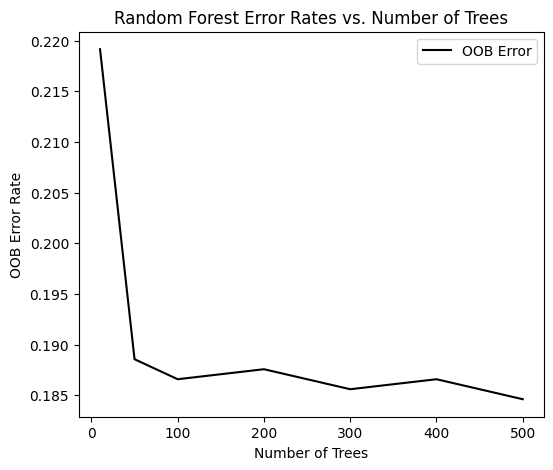

In [24]:
import matplotlib.pyplot as plt

# Simulate OOB error vs. number of trees
n_trees = [10, 50, 100, 200, 300, 400, 500]
oob_errors = []

for n in n_trees:
    temp_model = RandomForestClassifier(
        n_estimators=n,
        max_features='sqrt',
        min_samples_leaf=5,
        oob_score=True,
        random_state=11076
    )
    temp_model.fit(train[['age', 'household', 'position_level', 'absent', 'gender_encoded']], train['product'])
    oob_errors.append(1 - temp_model.oob_score_)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(n_trees, oob_errors, label='OOB Error', color='black')
plt.title('Random Forest Error Rates vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.legend()
plt.show()

#### Prediction and Evaluation


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predictions on test set
test['pred'] = rf_model.predict(test[['age', 'household', 'position_level', 'absent', 'gender_encoded']])

# Confusion Matrix
conf_matrix = confusion_matrix(test['product'], test['pred'], labels=rf_model.classes_)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=rf_model.classes_, columns=rf_model.classes_))

# Calculate metrics
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[1, 0]
FN = conf_matrix[0, 1]

accuracy = (TP + TN) / conf_matrix.sum()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Per-class Accuracy
per_class_acc = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print("Per-class Accuracy:")
print(pd.DataFrame({'Class': rf_model.classes_, 'Accuracy': per_class_acc}))

Confusion Matrix:
     A    B    C
A  133   12    3
B   26  105    6
C   20   20  110
Accuracy: 0.5471
Precision: 0.8015
Recall: 0.8974
Specificity: 0.8365
F1 Score: 0.8468
Per-class Accuracy:
  Class  Accuracy
0     A  0.898649
1     B  0.766423
2     C  0.733333


#### Cross-Validation

Cross-validation is a technique used to assess the performance of a machine learning model by partitioning the data into subsets, training the model on some subsets, and validating it on others. This helps to ensure that the model generalizes well to unseen data and reduces the risk of overfitting.

Wwe can implement `k-fold` cross-validation manually, as {randomForest} does not have a built-in cross-validation function.  Below is an R script that performs 5-fold cross-validation, evaluates the model’s performance (accuracy and confusion matrix)


In [26]:
from sklearn.model_selection import cross_val_score, KFold

# Ensure product is categorical and gender is encoded
mf['product'] = mf['product'].astype('category')
mf['gender_encoded'] = label_encoder.transform(mf['gender'])

# Define 5-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=11076)

# Perform cross-validation
rf_model_cv = RandomForestClassifier(n_estimators=500, max_features='sqrt', min_samples_leaf=5, random_state=11076)
cv_scores = cross_val_score(rf_model_cv, mf[['age', 'household', 'position_level', 'absent', 'gender_encoded']], mf['product'], cv=kf, scoring='accuracy')

# Aggregate results
mean_accuracy = cv_scores.mean()
sd_accuracy = cv_scores.std()
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {sd_accuracy:.4f}")

# Compute aggregate confusion matrix
conf_matrices = []
for train_idx, test_idx in kf.split(mf):
    train_data, test_data = mf.iloc[train_idx], mf.iloc[test_idx]
    rf_model_cv.fit(train_data[['age', 'household', 'position_level', 'absent', 'gender_encoded']], train_data['product'])
    test_pred = rf_model_cv.predict(test_data[['age', 'household', 'position_level', 'absent', 'gender_encoded']])
    conf_matrices.append(confusion_matrix(test_data['product'], test_pred, labels=rf_model.classes_))

agg_conf_matrix = sum(conf_matrices)
print("Aggregate Confusion Matrix:")
print(pd.DataFrame(agg_conf_matrix, index=rf_model.classes_, columns=rf_model.classes_))


Mean Cross-Validation Accuracy: 0.8059
Standard Deviation of Accuracy: 0.0233
Aggregate Confusion Matrix:
     A    B    C
A  422   63    8
B   47  388   22
C   70   71  357


#### Hyperparameter Tuning with Grid Search

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model's hyperparameters—settings that control the model's learning process but are not learned from the data (e.g., `ntree` and `mtry` in Random Forest in R). Proper tuning improves model performance by balancing bias and variance.

**Grid Search** is a common hyperparameter tuning method where a predefined set of values (a "grid") is specified for each hyperparameter. The algorithm evaluates the model's performance (e.g., using accuracy or OOB error) for all possible combinations in the grid. For example, if tuning `ntree` (100, 500) and `mtry` (1, 2), grid search tests all four combinations: (100, 1), (100, 2), (500, 1), (500, 2). The combination yielding the best performance is selected.

While effective, grid search can be computationally expensive for large grids. It ensures thorough exploration but may be supplemented with techniques like random search or Bayesian optimization for efficiency in complex models. Details on hyperparameter tuning and grid search  has discussed in the sparete notebook [Hyperparameter Tuning](https://zia207.github.io/r-colab/03-**-**-hyperparameter-tuning-introduction-r.html).

Hyperparameter tuning is performed using a grid search over `n_estimators` and `max_features`, equivalent to R's `ntree` and `mtry`. Scikit-learn's `GridSearchCV` is used instead of `tuneRF()`.

In [27]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': [1, 2, 3, 4]  # Around sqrt(5) ≈ 2.24
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestClassifier(min_samples_leaf=5, random_state=11076),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)
grid_search.fit(train[['age', 'household', 'position_level', 'absent', 'gender_encoded']], train['product'])

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: n_estimators = {best_params['n_estimators']}, max_features = {best_params['max_features']}, "
      f"Best Accuracy = {grid_search.best_score_:.4f}")

Best parameters: n_estimators = 100, max_features = 2, Best Accuracy = 0.8184


In [28]:
# Fit final model with best parameters
final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    min_samples_leaf=5,
    random_state=11076
)
final_rf_model.fit(mf[['age', 'household', 'position_level', 'absent', 'gender_encoded']], mf['product'])

# Predict on test set
test_predictions = final_rf_model.predict(test[['age', 'household', 'position_level', 'absent', 'gender_encoded']])

# Evaluate performance
conf_matrix = confusion_matrix(test['product'], test_predictions, labels=final_rf_model.classes_)
accuracy = accuracy_score(test['product'], test_predictions)
print("Test set accuracy:", accuracy)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=final_rf_model.classes_, columns=final_rf_model.classes_))

Test set accuracy: 0.8528735632183908
Confusion Matrix:
     A    B    C
A  136   12    0
B   10  122    5
C   18   19  113


#### Feature Importance

The feature importance in Random Forest is a measure of the influence of each feature on the model's accuracy. It is calculated by dividing the importance of each variable by its relative influence on the tree building process (i.e., whether the variable was chosen to split on) and the squared error (decreased across all trees) as a result of this. The significance of a feature in Random Forest is the sum of its importance across all decision trees.

In the context of Random Forest (RF) classification in R, particularly using the `randomForest` package, **variable importance** measures how much each predictor variable contributes to the model's predictive accuracy. Variable importance helps identify which features are most influential in distinguishing between classes. There are two primary methods for calculating variable importance in Random Forest classification: `Mean Decrease in Accuracy` (MDA) and `Mean Decrease in Gini` (MDG). B

`Mean Decrease in Accuracy (MDA)`:

MDA measures the reduction in `prediction accuracy` when a variable’s values are randomly permuted, breaking its association with the response. A larger decrease indicates higher importance. For each tree $t$ in the Random Forest (with $ntree$ trees):

1.  Compute the `out-of-bag (OOB)` error for tree $t$. The OOB sample consists of observations not included in the bootstrap sample used to train tree $t$.

-   Let $E_t$ be the OOB error rate (proportion of misclassified OOB observations).

2.  For each predictor variable $X_j$:

-   Randomly permute the values of $X_j$ in the OOB sample.
-   Recalculate the OOB error rate with the permuted $X_j$, denoted $E_t^{(j)}$.
-   The importance of $X_j$ for tree $t$ is:

$$ VI_t(X_j) = E_t^{(j)} - E_t $$ 

A positive $VI_t(X_j)$ indicates that permuting $X_j$ increases the error, suggesting $X_j$ is important.

-   Aggregate across all trees:

$$ MDA(X_j) = \frac{1}{ntree} \sum_{t=1}^{ntree} VI_t(X_j) $$

-   Normalize (optional): Divide by the standard deviation of $VI_t(X_j)$ across trees to account for variability:

$$ MDA_{\text{normalized}}(X_j) = \frac{MDA(X_j)}{\text{SD}(VI_t(X_j))} $$

Higher MDA values indicate greater importance. A negative MDA suggests the variable may not contribute to accuracy (permuting it reduces error, possibly due to noise).

`Mean Decrease in Gini (MDG)`:

MDG measures the total reduction in `Gini impurit` attributed to a variable across all splits where it is used. Gini impurity quantifies node impurity in classification trees, and variables that consistently reduce impurity are more important.

For a node $n$ with $K$ classes, the Gini impurity is:

$$ Gini(n) = 1 - \sum_{k=1}^K p_k^2 $$

 where $p_k$ is the proportion of class $k$ in node $n$. A lower Gini indicates a purer node.

-   For each tree $t$ in the Random Forest:

1.  For each node $n$ where variable $X_j$ is used to split:

-   Compute the weighted decrease in Gini impurity due to the split:

$$ \Delta Gini(n) = Gini(n) - \left( \frac{N_{left}}{N_n} Gini(n_{left}) + \frac{N_{right}}{N_n} Gini(n_{right}) \right) $$

where $N_n$, $N_{left}$, and $N_{right}$ are the number of observations in node $n$, its left child, and right child, respectively.

-   Weight $\Delta Gini(n)$ by the number of observations in node $n$ relative to the total sample size to reflect its contribution.

2.  Sum the weighted $\Delta Gini(n)$ for all nodes in tree $t$ where $X_j$ is used to split:

     
$$ VI_t(X_j) = \sum_{n \in t, \text{split on } X_j} \Delta Gini(n) \cdot \frac{N_n}{N} $$ 

where $N$ is the total number of observations.
`

-   Aggregate across all trees:

$$ MDG(X_j) = \frac{1}{ntree} \sum_{t=1}^{ntree} VI_t(X_j) $$

Higher MDG values indicate that $X_j$ is frequently used in splits that significantly reduce node impurity, suggesting greater importance.

##### Extract Variable Importance

In [29]:
# Extractfeture importance (MDI)
imp_data = pd.DataFrame({
    'Var.Names': ['age', 'household', 'position_level', 'absent', 'gender_encoded'],
    'MeanDecreaseGini': rf_model.feature_importances_
})
print(imp_data)

# Compute Mean Decrease in Accuracy (MDA) manually
from sklearn.metrics import accuracy_score
import numpy as np

mda = []
X_train = train[['age', 'household', 'position_level', 'absent', 'gender_encoded']]
y_train = train['product']
baseline_accuracy = accuracy_score(y_train, final_rf_model.predict(X_train))

for col in X_train.columns:
    X_permuted = X_train.copy()
    X_permuted[col] = np.random.permutation(X_permuted[col].values)
    permuted_accuracy = accuracy_score(y_train, rf_model.predict(X_permuted))
    mda.append(baseline_accuracy - permuted_accuracy)

imp_data['MeanDecreaseAccuracy'] = mda
print(imp_data)

        Var.Names  MeanDecreaseGini
0             age          0.470372
1       household          0.310824
2  position_level          0.057494
3          absent          0.068399
4  gender_encoded          0.092911
        Var.Names  MeanDecreaseGini  MeanDecreaseAccuracy
0             age          0.470372              0.335637
1       household          0.310824              0.251728
2  position_level          0.057494              0.058243
3          absent          0.068399              0.049358
4  gender_encoded          0.092911              0.108588


##### Plot Variable Importance

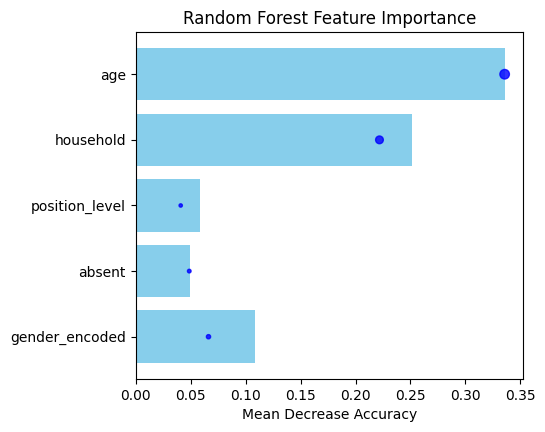

In [30]:
# Plot variable importance
plt.figure(figsize=(5, 4.5))
plt.barh(imp_data['Var.Names'], imp_data['MeanDecreaseAccuracy'], color='skyblue')
plt.scatter(imp_data['MeanDecreaseGini'] * imp_data['MeanDecreaseAccuracy'].max() / imp_data['MeanDecreaseGini'].max(),
            imp_data['Var.Names'], color='blue', s=imp_data['MeanDecreaseGini'] * 100, alpha=0.8)
plt.title('Random Forest Feature Importance')
plt.xlabel('Mean Decrease Accuracy')
plt.ylabel('')
plt.gca().invert_yaxis()  # Flip y-axis to match R plot
plt.show()

### Regression Example



#### Data



In [31]:
# Load and prepare Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Set random seed for reproducibility
np.random.seed(123)

# Select relevant columns
df = df[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Display data summary
print(df.head())
print(df.dtypes)

# Convert CHAS to category
df['CHAS'] = df['CHAS'].astype('category')

# Ensure RAD and TAX are numeric (in case they are integers)
df['RAD'] = df['RAD'].astype(float)
df['TAX'] = df['TAX'].astype(float)

# Apply one-hot encoding to CHAS
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)

# Split data into training (70%) and test (30%) sets
train, test = train_test_split(df, train_size=0.70, random_state=101)

# Feature scaling
scaler = StandardScaler()
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

# Display scaled data summary
print("\nTraining set after scaling:")
print(train.head())
print("\nTest set after scaling:")
print(test.head())


   MEDV     CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0  24.0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1  21.6  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2  34.7  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3  33.4  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4  36.2  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
MEDV        float64
CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

Training set after scaling:
     MEDV      CRIM        ZN     INDUS       

#### Fit Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define features and target
X_train = train.drop('MEDV', axis=1)
y_train = train['MEDV']
X_test = test.drop('MEDV', axis=1)
y_test = test['MEDV']

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_features=8,
    min_samples_leaf=110,
    random_state=123
)
rf_model.fit(X_train, y_train)
# Model summary
print(rf_model)

RandomForestRegressor(max_features=8, min_samples_leaf=110, n_estimators=500,
                      random_state=123)


#### Prediction and Evaluation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
test['MEDV_pred'] = rf_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test['MEDV'], test['MEDV_pred']))
mae = mean_absolute_error(test['MEDV'], test['MEDV_pred'])
r2 = r2_score(test['MEDV'], test['MEDV_pred'])
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f"Test set R-squared: {r2}")

RMSE: 8.15814763122799
MAE: 5.839721928656336
Test set R-squared: 0.32948552151545074


#### Cross-validation

In [34]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor

# Perform 5-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=123)
mses = []
r2_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    X_train_fold = X_train.iloc[train_idx]
    y_train_fold = y_train.iloc[train_idx]
    X_val_fold = X_train.iloc[val_idx]
    y_val_fold = y_train.iloc[val_idx]

    # Fit Random Forest model
    rf_model = RandomForestRegressor(
        n_estimators=500,
        random_state=123,
        n_jobs=-1
    )
    rf_model.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_pred = rf_model.predict(X_val_fold)

    # Compute MSE and R-squared
    mse = mean_squared_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    mses.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

# Aggregate cross-validation results
mean_mse = np.mean(mses)
std_mse = np.std(mses)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
print("\nCross-Validation Results:")
print(f"Mean MSE: {mean_mse:.4f}")
print(f"Standard Deviation of MSE: {std_mse:.4f}")
print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Fold 1 - MSE: 8.2904, R-squared: 0.8611
Fold 2 - MSE: 8.3005, R-squared: 0.8992
Fold 3 - MSE: 11.4242, R-squared: 0.8686
Fold 4 - MSE: 18.9045, R-squared: 0.7533
Fold 5 - MSE: 7.3002, R-squared: 0.9076

Cross-Validation Results:
Mean MSE: 10.8439
Standard Deviation of MSE: 4.2628
Mean R-squared: 0.8580
Standard Deviation of R-squared: 0.0552


#### Hyperparameter Tuning with Grid Search



In [35]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': [1, 2, 3, 4]
}
results = []

# Grid search
for params in ParameterGrid(param_grid):
    rf_model = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_features=params['max_features'],
        oob_score=True,
        random_state=123
    )
    rf_model.fit(X_train, y_train)
    oob_mse = mean_squared_error(y_train, rf_model.oob_prediction_)
    results.append({
        'n_estimators': params['n_estimators'],
        'max_features': params['max_features'],
        'oob_mse': oob_mse
    })





In [36]:
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['oob_mse'].idxmin()]
print(f"Best parameters: n_estimators = {best_params['n_estimators']}, "
      f"max_features = {best_params['max_features']}, OOB MSE = {best_params['oob_mse']}")

Best parameters: n_estimators = 1000.0, max_features = 4.0, OOB MSE = 9.308164956152929


In [37]:
# Fit final model with best parameters
final_rf_model = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_features=int(best_params['max_features']),
    random_state=123
)
final_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=1000, random_state=123)

#### Prediction and Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
test['MEDV_pred'] = final_rf_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test['MEDV'], test['MEDV_pred']))
mae = mean_absolute_error(test['MEDV'], test['MEDV_pred'])
r2 = r2_score(test['MEDV'], test['MEDV_pred'])
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f"Test set R-squared: {r2}")

RMSE: 3.8162565307924146
MAE: 2.6556947368421
Test set R-squared: 0.8532763369662887


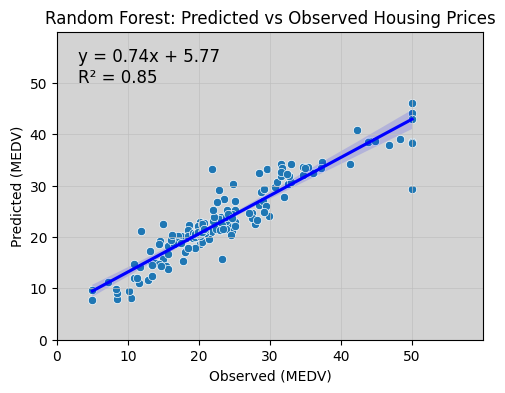

In [39]:
import seaborn as sns

# Create scatter plot with regression line
plt.figure(figsize=(5.5, 4))
sns.scatterplot(x='MEDV', y='MEDV_pred', data=test)
sns.regplot(x='MEDV', y='MEDV_pred', data=test, scatter=False, color='blue')

# Add regression equation and R²
slope, intercept = np.polyfit(test['MEDV'], test['MEDV_pred'], 1)
r2 = r2_score(test['MEDV'], test['MEDV_pred'])
eq = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.2f}'
plt.text(0.05, 0.95, eq, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.title('Random Forest: Predicted vs Observed Housing Prices')
plt.xlabel('Observed (MEDV)')
plt.ylabel('Predicted (MEDV)')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(0, 60, 10))
plt.gca().set_facecolor('lightgray')
plt.grid(color='0.75', linestyle='-', linewidth=0.5)
plt.show()

#### Feature Importance

In the context of a Random Forest regression model using the `randomForest` package in R, **feature importance** (also called variable importance) measures how much each predictor variable contributes to reducing prediction error. For regression, the `randomForest` package provides two primary importance metrics: `%IncMSE` (Percent Increase in Mean Squared Error, equivalent to Mean Decrease in Accuracy) and `IncNodePurity` (Increase in Node Purity, based on Mean Squared Error reduction). Below, I explain how these are calculated for regression, with mathematical details and R implementation.

`%IncMSE (Percent Increase in Mean Squared Error):`

%IncMSE measures the increase in prediction error when a variable’s values are randomly permuted, breaking its association with the response. A larger increase indicates higher importance.

-   For each tree $t$ in the Random Forest (with $ntree$) trees):

1.  Compute the `out-of-bag (OOB)` Mean Squared Error (MSE) for tree $t$. The OOB sample includes observations not used in the bootstrap sample for tree $t$.

-   Let $MSE_t$ be the OOB MSE:

$$ MSE_t = \frac{1}{N_{OOB}} \sum_{i \in OOB} (y_i - \hat{y}_{t,i})^2 $$

where $y_i$ is the true response, $\hat{y}_{t,i}$ is the predicted value, and $N_{OOB}$ is the number of OOB observations.

2.  For each predictor variable $X_j$:

    -   Randomly permute the values of $X_j$ in the OOB sample.

    -   Recalculate the OOB MSE with the permuted $X_j$, denoted $MSE_t^{(j)}$.

    -   The raw importance score for $X_j$ in tree $t$ is:

$$ VI_t(X_j) = MSE_t^{(j)} - MSE_t $$ 

A positive $VI_t(X_j)$ indicates that permuting $X_j$ increases the error, suggesting importance.

-   Aggregate across all trees:

$$ IncMSE(X_j) = \frac{1}{ntree} \sum_{t=1}^{ntree} VI_t(X_j) $$

-   Convert to percentage (%IncMSE):

$$ \%IncMSE(X_j) = \frac{IncMSE(X_j)}{\text{Mean MSE}} \times 100 $$

where Mean MSE is the average OOB MSE across trees. Alternatively, it’s often reported as the raw $IncMSE$ or normalized by the standard deviation of $VI_t(X_j)$:

$$ \%IncMSE_{\text{normalized}}(X_j) = \frac{IncMSE(X_j)}{\text{SD}(VI_t(X_j))} $$

Higher `%IncMSE` values indicate greater importance. A negative value suggests the variable may not contribute to accuracy (permuting it reduces error, possibly due to noise).

`2. IncNodePurity (Increase in Node Purity)`

IncNodePurity measures the total reduction in `Mean Squared Error (MSE)` attributed to a variable across all splits where it is used. In regression, node purity is defined by MSE, and variables that consistently reduce MSE are more important.

For a node $n$ with $N_n$ observations, the MSE for a node is:

$$ MSE(n) = \frac{1}{N_n} \sum_{i \in n} (y_i - \bar{y}_n)^2 $$

where $\bar{y}_n$ is the mean response in node $n$. A lower MSE indicates a purer node.

-   For each tree $t$

1.  For each node ( n ) where variable $X_j$ is used to split:

-   Compute the weighted decrease in MSE due to the split:

$$ \Delta MSE(n) = MSE(n) - \left( \frac{N_{left}}{N_n} MSE(n\_{left}) + \frac{N_{right}}{N_n} MSE(n\_{right}) \right) $$

where $N_{left}$ and $N_{right}$ are the number of observations in the left and right child nodes.

-   Weight $\Delta MSE(n)$ by the number of observations in node $n$ relative to the total sample size $N$.

2.  Sum the weighted $\Delta MSE(n)$ for all nodes in tree $t$ where $X_j$ is used:

$$ VI_t(X_j) = \sum\_{n \in t, \text{split on } X_j} \Delta MSE(n) \cdot \frac{N_n}{N} $$

-   Aggregate across all trees:

$$ IncNodePurity(X_j) = \frac{1}{ntree} \sum\_{t=1}\^{ntree} VI_t(X_j) $$

Higher `IncNodePurity` values indicate that \$X_j is frequently used in splits that significantly reduce MSE, suggesting greater importance.

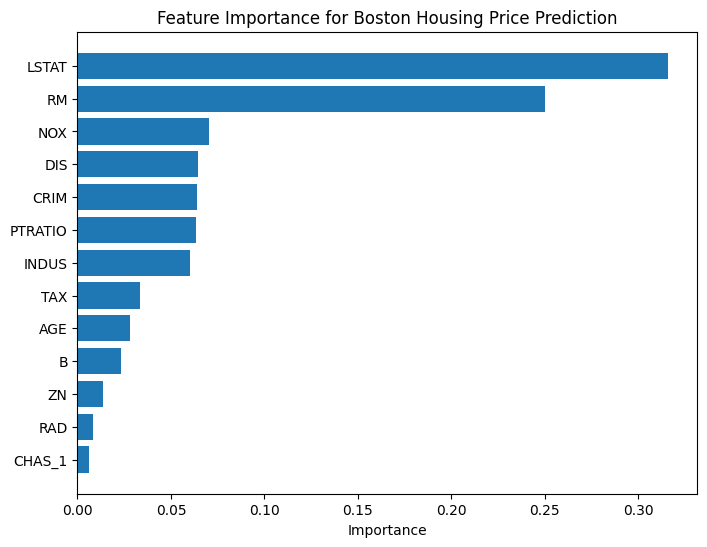

In [40]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='#1f77b4')
plt.xlabel('Importance')
plt.title('Feature Importance for Boston Housing Price Prediction')
plt.gca().invert_yaxis()
plt.show()

## Summary and Conclusion

This notebook explores the Random Forest algorithm for classification and regression in Python. It covers the core concepts, including bagging, random feature selection, and how the algorithm works. The notebook provides implementations from scratch to illustrate the underlying mechanics and then demonstrates practical applications using the scikit-learn library.

Key aspects covered include:
- Theoretical explanation of Random Forest principles.
- Step-by-step implementation of a basic Random Forest model from scratch for both classification (Iris dataset) and regression (Boston Housing dataset).
- Using scikit-learn for more efficient Random Forest models on Health Insurance data (classification) and gp_soil_data (regression).
- Techniques for model evaluation, including OOB error, confusion matrices, and regression metrics (RMSE, MAE, R²).
- Visualizing model performance (OOB error plots, 1:1 predicted vs observed plots) and feature importance.
- Hyperparameter tuning using Grid Search to optimize model performance.

In conclusion, Random Forest is a powerful ensemble method effective for various machine learning tasks. This notebook provides a solid foundation and practical examples for implementing and evaluating Random Forest models in Python.


## References

### Books

Below is a list of five important books that cover Random Forest, either directly or as part of broader machine learning and statistical learning topics. These books are widely recognized for their clarity, depth, and relevance to understanding Random Forest and related ensemble methods.

1.  `The Elements of Statistical Learning: Data Mining, Inference, and Prediction` by Trevor Hastie, Robert Tibshirani, and Jerome Friedman

2.  `An Introduction to Statistical Learning: with Applications in R` by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani

3.  `Machine Learning with R: Expert Techniques for Predictive Modeling` by Brett Lantz

4.  `Applied Predictive Modeling` by Max Kuhn and Kjell Johnson

5.  `Pattern Recognition and Machine Learning` by Christopher M. Bishop

### Online Resources

1.  **Random Forest Simplified:** [https://builtin.com/data-science/random-forest-algorithm](https://builtin.com/data-science/random-forest-algorithm)
2.  **Random Forest in Python:** [https://towardsdatascience.com/random-forest-in-python-23d42a9f19c](https://towardsdatascience.com/random-forest-in-python-23d42a9f19c)
3.  **Machine Learning with Random Forests in Python:** [https://www.datacamp.com/tutorial/random-forest-in-python](https://www.datacamp.com/tutorial/random-forest-in-python)
4.  **Understanding Random Forest:** [https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/)
5.  **Random Forest Regression Explained:** [https://machinelearningmastery.com/random-forest-for-machine-learning/](https://machinelearningmastery.com/random-forest-for-machine-learning/)

